In [4]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

Here I have extracted reviews for boAt smartwatch on Amazon

In [7]:
boAt_review= []

In [8]:
for i in range (1,41):
    boAt=[]
    url="https://www.amazon.in/boAt-Smartwatch-Multiple-Monitoring-Resistance/product-reviews/B096VF1PJ8?reviewerType=all_reviews"+str(i)
    response=requests.get(url)
    soup=bs(response.content,"html.parser")
    reviews=soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
    for i in range (len(reviews)):
        boAt.append(reviews[i].text)
    boAt_review=boAt_review+boAt

In [9]:
boAt_review

["\n\n\n\n\n                    The media could not be loaded.\n                \n\n\n\n\xa0Used this watch for over a month now.. Bought it during the first sale.. Keep reading for an unbiased review and tips/tricks to ensure all the functions in the watch are working smoothly.1) Large Curved  Display in this price category - 1.69 inch2) Battery with heavy usage and frequently waking up the screen, alexa, alarms, notifications is about 3 days. On standby  while just checking the time occassionally is about 8 days. Pretty good. Full charging time is about 1.5 hours. Decent quality magnetic charging cable provided. Use your own low power adapter, power bank or laptop.3) Has all the necessary health / workout tracking options.. Spo2( Oxymeter), Heart Rate monitor..Accuracy is 95-98%. Sleep tracking is pretty accurate too. Paedometer is accurate most of the times, but sometimes few hundred steps are added randomly without any activity. This happens randomly once in 3-4 days. Stress Monito

In [10]:

len(boAt_review)

90

In [11]:
rev={"review":boAt_review}

In [12]:
review_data=pd.DataFrame.from_dict(rev)
pd.set_option('max_colwidth',800)

In [13]:
review_data

,review
0,"\n\n\n\n\n The media could not be loaded.\n \n\n\n\n Used this watch for over a month now.. Bought it during the first sale.. Keep reading for an unbiased review and tips/tricks to ensure all the functions in the watch are working smoothly.1) Large Curved Display in this price category - 1.69 inch2) Battery with heavy usage and frequently waking up the screen, alexa, alarms, notifications is about 3 days. On standby while just checking the time occassionally is about 8 days. Pretty good. Full charging time is about 1.5 hours. Decent quality magnetic charging cable provided. Use your own low power adapter, power bank or laptop.3) Has all the necessary health / workout tracking options.. Spo2( Oxymeter), Heart Rate monitor..Accuracy is 95-98%. Sleep tr..."
1,\n\n\n\n\n The media could not be loaded.\n \n\n\n\n The gold colour frame actually looks like brass colour effect. Watch has very good performance in terms of sensitivity heart rate sleep monitor and activities. Wristband is very soft and comfortable you can easily where it and sleep the weight of the watch is very light. Mobile UI interface is also good. Best watch in this segment\n
2,
3,"\nIt's a amazing product working ,tracking condition good with in minimal prices point.\n"
4,\nThe watch is good but sometimes the Alexa does not work . The battery charging is fast and last for 2 weeks for me. Straps are of good quality.\n
...,...
85,\nthe music was definitely not working and there is no cameraand every time we have to connect to the phone again\n
86,\nCalling Feature Not Available\n
87,\nGood.\n
88,\nGood little bit\n


**Cleaning the Text**

In [14]:
text=" ".join(review_data)

In [15]:
def clean_text(text):
    text=re.sub('@[A-Za-z0-9]+','',str(text))
    text=re.sub('#','',str(text))
    text=re.sub('RT[\s]+','',str(text))
    text=re.sub('\n\n','',str(text)) 
    text=text.lower()
    text=re.sub('https?:\/\/\S+','',str(text)) 
    
    return text
review_data["review"]=review_data["review"].apply(clean_text)

In [16]:
review_data

,review
0,"\n the media could not be loaded.\n used this watch for over a month now.. bought it during the first sale.. keep reading for an unbiased review and tips/tricks to ensure all the functions in the watch are working smoothly.1) large curved display in this price category - 1.69 inch2) battery with heavy usage and frequently waking up the screen, alexa, alarms, notifications is about 3 days. on standby while just checking the time occassionally is about 8 days. pretty good. full charging time is about 1.5 hours. decent quality magnetic charging cable provided. use your own low power adapter, power bank or laptop.3) has all the necessary health / workout tracking options.. spo2( oxymeter), heart rate monitor..accuracy is 95-98%. sleep tracking is pretty..."
1,\n the media could not be loaded.\n the gold colour frame actually looks like brass colour effect. watch has very good performance in terms of sensitivity heart rate sleep monitor and activities. wristband is very soft and comfortable you can easily where it and sleep the weight of the watch is very light. mobile ui interface is also good. best watch in this segment\n
2,
3,"\nit's a amazing product working ,tracking condition good with in minimal prices point.\n"
4,\nthe watch is good but sometimes the alexa does not work . the battery charging is fast and last for 2 weeks for me. straps are of good quality.\n
...,...
85,\nthe music was definitely not working and there is no cameraand every time we have to connect to the phone again\n
86,\ncalling feature not available\n
87,\ngood.\n
88,\ngood little bit\n


In [17]:
text=" ".join(review_data["review"])


In [18]:
text

"\n                    the media could not be loaded.\n                \xa0used this watch for over a month now.. bought it during the first sale.. keep reading for an unbiased review and tips/tricks to ensure all the functions in the watch are working smoothly.1) large curved  display in this price category - 1.69 inch2) battery with heavy usage and frequently waking up the screen, alexa, alarms, notifications is about 3 days. on standby  while just checking the time occassionally is about 8 days. pretty good. full charging time is about 1.5 hours. decent quality magnetic charging cable provided. use your own low power adapter, power bank or laptop.3) has all the necessary health / workout tracking options.. spo2( oxymeter), heart rate monitor..accuracy is 95-98%. sleep tracking is pretty accurate too. paedometer is accurate most of the times, but sometimes few hundred steps are added randomly without any activity. this happens randomly once in 3-4 days. stress monitor is also there b

In [19]:
text_tokens = word_tokenize(text)

In [20]:
text_tokens

['the',
 'media',
 'could',
 'not',
 'be',
 'loaded',
 '.',
 'used',
 'this',
 'watch',
 'for',
 'over',
 'a',
 'month',
 'now',
 '..',
 'bought',
 'it',
 'during',
 'the',
 'first',
 'sale',
 '..',
 'keep',
 'reading',
 'for',
 'an',
 'unbiased',
 'review',
 'and',
 'tips/tricks',
 'to',
 'ensure',
 'all',
 'the',
 'functions',
 'in',
 'the',
 'watch',
 'are',
 'working',
 'smoothly.1',
 ')',
 'large',
 'curved',
 'display',
 'in',
 'this',
 'price',
 'category',
 '-',
 '1.69',
 'inch2',
 ')',
 'battery',
 'with',
 'heavy',
 'usage',
 'and',
 'frequently',
 'waking',
 'up',
 'the',
 'screen',
 ',',
 'alexa',
 ',',
 'alarms',
 ',',
 'notifications',
 'is',
 'about',
 '3',
 'days',
 '.',
 'on',
 'standby',
 'while',
 'just',
 'checking',
 'the',
 'time',
 'occassionally',
 'is',
 'about',
 '8',
 'days',
 '.',
 'pretty',
 'good',
 '.',
 'full',
 'charging',
 'time',
 'is',
 'about',
 '1.5',
 'hours',
 '.',
 'decent',
 'quality',
 'magnetic',
 'charging',
 'cable',
 'provided',
 '.',
 'us

**Creating DF**

In [21]:
text_without_sw=[word for word in text_tokens if not word in stopwords.words()]


In [22]:
tf=TfidfVectorizer()

In [23]:
text_tf=tf.fit_transform(text_without_sw)


In [24]:
feature_names=tf.get_feature_names()
dense=text_tf.todense()
denselist=dense.tolist()
df=pd.DataFrame(denselist,columns=feature_names)

C:\Users\Nishad Todkar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
df

,10,11,12,15,30,40,50,69,95,98,...,whatsapp,white,wireless,work,working,workout,works,worries,wristband,xtend
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
words_list=" ".join(df)

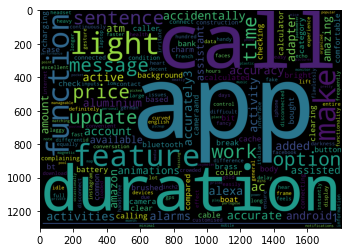

In [27]:
wordcloud=WordCloud(background_color="black",width=1800,height=1300).generate(words_list)
plt.imshow(wordcloud)

**Emotion Mining**

In [28]:
with open ("positive-words.txt","r") as pw:
    positive_words=pw.read().split("/n")
    
positive_words=positive_words[35:]

In [29]:
with open ("negative-words.txt","r") as nw:
    negative_words=nw.read().split("/n")
    
negative_words=negative_words[35:]

In [30]:
neg_text=" ".join([word for word in df if not word in negative_words])

In [31]:
pos_text=" ".join([word for word in df if not word  in positive_words])

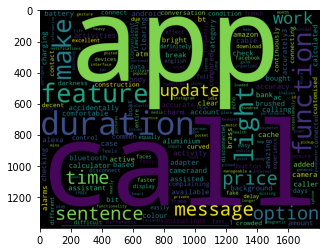

In [32]:
pos_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(pos_text)
plt.imshow(pos_wordcloud)

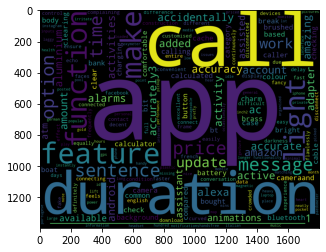

In [33]:
neg_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(neg_text)
plt.imshow(neg_wordcloud)

In [34]:
from textblob import TextBlob
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["review"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

review_data[["subjectivity", "polarity"]] = review_data.apply(sentiment_analysis, axis=1)
review_data


,review,subjectivity,polarity
0,"\n the media could not be loaded.\n used this watch for over a month now.. bought it during the first sale.. keep reading for an unbiased review and tips/tricks to ensure all the functions in the watch are working smoothly.1) large curved display in this price category - 1.69 inch2) battery with heavy usage and frequently waking up the screen, alexa, alarms, notifications is about 3 days. on standby while just checking the time occassionally is about 8 days. pretty good. full charging time is about 1.5 hours. decent quality magnetic charging cable provided. use your own low power adapter, power bank or laptop.3) has all the necessary health / workout tracking options.. spo2( oxymeter), heart rate monitor..accuracy is 95-98%. sleep tracking is pretty...",0.475246,0.143650
1,\n the media could not be loaded.\n the gold colour frame actually looks like brass colour effect. watch has very good performance in terms of sensitivity heart rate sleep monitor and activities. wristband is very soft and comfortable you can easily where it and sleep the weight of the watch is very light. mobile ui interface is also good. best watch in this segment\n,0.597292,0.511667
2,,0.000000,0.000000
3,"\nit's a amazing product working ,tracking condition good with in minimal prices point.\n",0.700000,0.400000
4,\nthe watch is good but sometimes the alexa does not work . the battery charging is fast and last for 2 weeks for me. straps are of good quality.\n,0.466667,0.400000
...,...,...,...
85,\nthe music was definitely not working and there is no cameraand every time we have to connect to the phone again\n,0.500000,0.000000
86,\ncalling feature not available\n,0.400000,-0.200000
87,\ngood.\n,0.600000,0.700000
88,\ngood little bit\n,0.550000,0.256250


In [35]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
review_data["analysis"] = review_data["polarity"].apply(analysis)
review_data

,review,subjectivity,polarity,analysis
0,"\n the media could not be loaded.\n used this watch for over a month now.. bought it during the first sale.. keep reading for an unbiased review and tips/tricks to ensure all the functions in the watch are working smoothly.1) large curved display in this price category - 1.69 inch2) battery with heavy usage and frequently waking up the screen, alexa, alarms, notifications is about 3 days. on standby while just checking the time occassionally is about 8 days. pretty good. full charging time is about 1.5 hours. decent quality magnetic charging cable provided. use your own low power adapter, power bank or laptop.3) has all the necessary health / workout tracking options.. spo2( oxymeter), heart rate monitor..accuracy is 95-98%. sleep tracking is pretty...",0.475246,0.143650,Positive
1,\n the media could not be loaded.\n the gold colour frame actually looks like brass colour effect. watch has very good performance in terms of sensitivity heart rate sleep monitor and activities. wristband is very soft and comfortable you can easily where it and sleep the weight of the watch is very light. mobile ui interface is also good. best watch in this segment\n,0.597292,0.511667,Positive
2,,0.000000,0.000000,Neutral
3,"\nit's a amazing product working ,tracking condition good with in minimal prices point.\n",0.700000,0.400000,Positive
4,\nthe watch is good but sometimes the alexa does not work . the battery charging is fast and last for 2 weeks for me. straps are of good quality.\n,0.466667,0.400000,Positive
...,...,...,...,...
85,\nthe music was definitely not working and there is no cameraand every time we have to connect to the phone again\n,0.500000,0.000000,Neutral
86,\ncalling feature not available\n,0.400000,-0.200000,Negative
87,\ngood.\n,0.600000,0.700000,Positive
88,\ngood little bit\n,0.550000,0.256250,Positive


In [36]:
review_data['analysis'].value_counts()


Positive    63
Neutral     18
Negative     9
Name: analysis, dtype: int64